<div style="color:#fff;display:fill;border-radius:10px;background-color:#3c968b;text-align:left;letter-spacing:0.1px;overflow:hidden;padding:20px;color:white;overflow:hidden;margin:0;font-size:100%">
<h1>Machine Learning Lab 8: Spam classification with Naive bayes </h1>
Name: Deshmukh Pratik Bhushanrao <br>
Roll No: 2448513
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import libraries

In [45]:
df = pd.read_csv('data\\spam.csv')
df.head()

# import dataset

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


EDA

In [3]:
df.info()

# check for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
df.isna().sum()

# check for null values

Category    0
Message     0
dtype: int64

[]

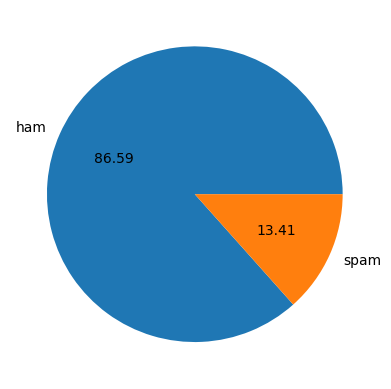

In [46]:
plt.pie(df['Category'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f", labeldistance=1.1,)
plt.plot()

# plot pie chart for ham and spam (class distribution)

In [47]:
import nltk
import spacy
import re

nlp = spacy.load('en_core_web_lg')

# import libraries and load spacy model

In [7]:
stopwords = spacy.lang.en.stop_words.STOP_WORDS 

df['Message'] = df['Message'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
df['Message'] = df['Message'].apply(lambda x: ' '.join([word.lower() for word in x.split() if word not in (stopwords)]))
df['Message'] = df['Message'].apply(lambda x: ' '.join([word.lemma_ for word in nlp(x)]))

df['Message'].head()

# remove stopwords, punctuations, lemmatize and convert to lower case

0    go jurong point crazy available bugis n great ...
1                                ok lar joke wif u oni
2    free entry 2 wkly comp win fa cup final tkts 2...
3                                  u dun early hor u c
4                       nah I do not think go usf life
Name: Message, dtype: object

In [48]:
df.Message[0]

# checking the above process

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

embeddings = vectorizer.fit_transform(df['Message'])
target = df['Category'].map({'ham': 0, 'spam': 1})

# apply tfidf vectorizer to dataset

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(embeddings, target, test_size=0.2, random_state=42, stratify=target)

# split dataset into train and test

In [23]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB(alpha=1.0, force_alpha=True)

# instantiate MultinomialNB

In [24]:
naive_bayes.fit(X_train, y_train)

# fit MultinomialNB to train set

MultinomialNB()

In [65]:
print(naive_bayes.score(X_train, y_train))
print(naive_bayes.score(X_test, y_test))

# check train and test scores

0.9748709894547902
0.9614349775784753


In [26]:
y_pred = naive_bayes.predict(X_test)

# predict on test set

<Axes: >

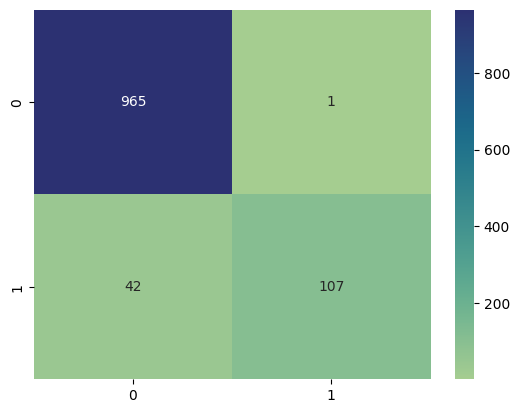

In [73]:
from sklearn.metrics import confusion_matrix, classification_report

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='crest', fmt='.0f')

# plotting confusion matrix

In [74]:
print(classification_report(y_test, y_pred))

# print classification report

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       0.99      0.72      0.83       149

    accuracy                           0.96      1115
   macro avg       0.97      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



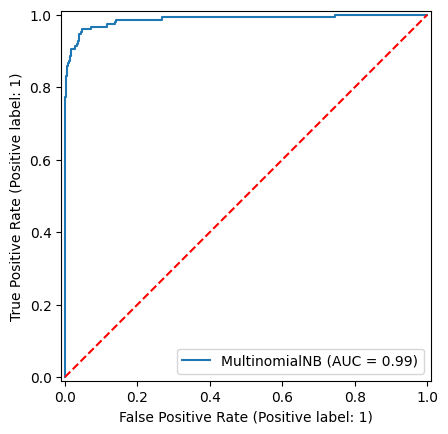

In [80]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, precision_recall_curve
RocCurveDisplay.from_estimator(naive_bayes, X_test, y_test)
plt.plot([0,1], [0,1], 'r--')

# plotting roc curve

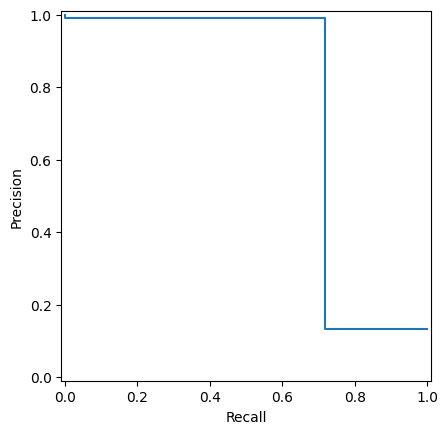

In [81]:
precision, recall, threshold = precision_recall_curve(y_test, y_pred)
PrecisionRecallDisplay(precision, recall).plot()

# plotting precision recall curve

<BarContainer object of 20 artists>

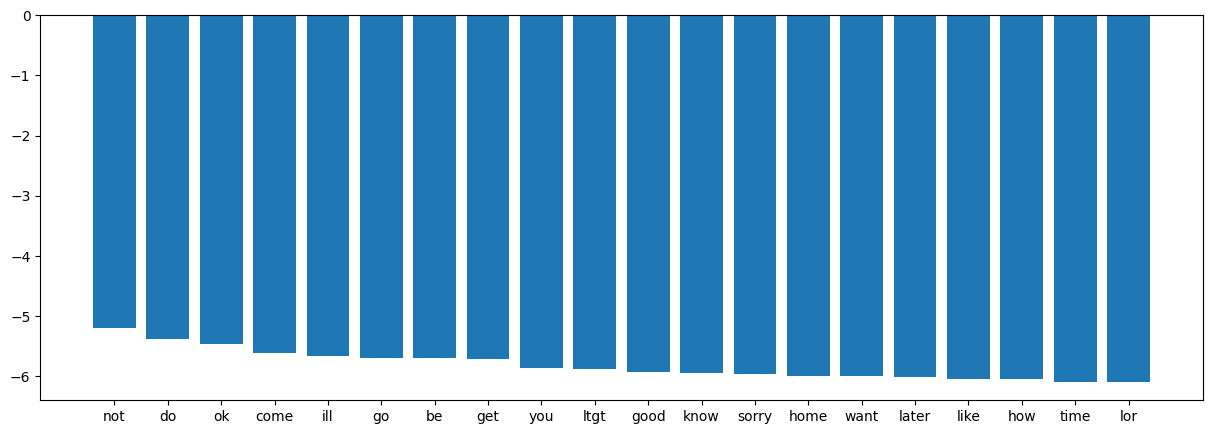

In [82]:
feature_log_prob = naive_bayes.feature_log_prob_
features = vectorizer.get_feature_names_out()

top20 = sorted(zip(naive_bayes.feature_log_prob_[0], features), reverse=True)[:20]

plt.figure(figsize=(15, 5))
plt.bar([x[1] for x in top20], [x[0] for x in top20])

# plot top 20 features and their weights

[]

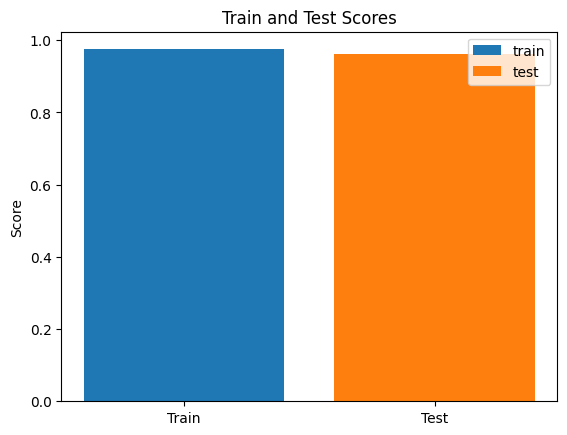

In [83]:
plt.bar(1, naive_bayes.score(X_train, y_train), label='train')
plt.bar(2,naive_bayes.score(X_test, y_test), label='test')
plt.ylabel('Score')
plt.legend()
plt.xticks([1, 2], ['Train', 'Test'])
plt.title('Train and Test Scores')
plt.plot()

# plot train and test scores

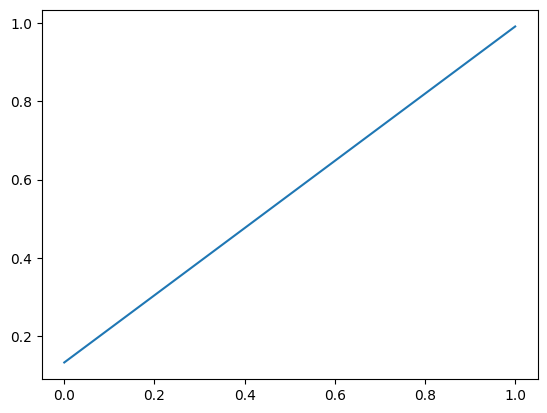

In [87]:
plt.plot(threshold, precision[:-1], label='precision')

# plot precision and threshold

# __________________ EOD _________________